In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(219)

## hyperparameters

In [2]:
k_armed_bandit = 10

max_steps = 1000
max_episodes = 2000
alpha = 0.1
initial_mean = 4.0

## definition of function and class

In [3]:
class k_armed_bandit_machine:
  def __init__(self, k_armed_bandit, initial_mean):
    self.k_armed_bandit = k_armed_bandit
    
    self.reward_dist_mean = np.random.normal(loc=initial_mean, scale=1.0, size=[self.k_armed_bandit])
    #print("reward_dist_mean: expected reward q*")
    #print(self.reward_dist_mean)

    self.reward_dist_stddev = np.ones(self.k_armed_bandit)
    #print("reward_dist_stddev: standard deviation of expected reward q*")
    #print(self.reward_dist_stddev)
    
  def pulling_arm(self, arm_number):
    """pull k armed bandit machine given arm_number
    Args:
      arm_number: int, machine number we select. [0, k_armed_bandit-1]

    Returns:
      reward: reward of the machine we select from normal distribution.
    """
    assert arm_number < self.k_armed_bandit
    return np.random.normal(loc=self.reward_dist_mean[arm_number],
                            scale=self.reward_dist_stddev[arm_number])
  
  def reward_dist_update(self):
    random_walk_size = np.random.normal(loc=0.0, scale=0.01, size=[self.k_armed_bandit])
    self.reward_dist_mean += random_walk_size
    
  def get_optimal_action_at_t(self):
    self.optimal_action = np.argmax(self.reward_dist_mean)
    return self.optimal_action

In [4]:
class q_function:
  def __init__(self, k_armed_bandit, alpha, is_baseline=True):
    self.k_armed_bandit = k_armed_bandit
    self.preference = np.zeros(k_armed_bandit)
    self.probability = np.zeros(k_armed_bandit)
    self.sum_reward = 0.0
    self.alpha = alpha
    self.is_baseline = is_baseline
    
  def get_softmax(self):
    max_preference = np.max(self.preference)
    preference = np.exp(self.preference - max_preference)
    self.probability = preference / np.sum(preference)
    return self.probability
    
  def select_action(self):
    self.get_softmax()
    return np.random.choice(10, 1, p=self.probability)
  
  def update(self, reward, action, time):
    if self.is_baseline:
      for i in range(self.k_armed_bandit):
        if i != action:
          self.preference[i] -= self.alpha * (reward - self.sum_reward/time) * self.probability[i]
        else:
          self.preference[i] += self.alpha * (reward - self.sum_reward/time) * (1.0 - self.probability[i])
    else:
      for i in range(self.k_armed_bandit):
        if i != action:
          self.preference[i] -= self.alpha * reward * self.probability[i]
        else:
          self.preference[i] += self.alpha * reward * (1.0 - self.probability[i])

    self.sum_reward += reward

## Training

### one episode, $\alpha = 0.1$ with baseline for code validation

In [5]:
my_bandit = k_armed_bandit_machine(k_armed_bandit, initial_mean)
my_q = q_function(k_armed_bandit, alpha)

for step in range(max_steps):
  # gradient bandit algorithms
  # No need epsilon
  action = my_q.select_action()
  
  #print("optimal:", my_bandit.get_optimal_action_at_t())
  #print("action:", action)
  #print("\n")

  reward = my_bandit.pulling_arm(action)
  my_q.update(reward, action, step + 1)
  my_bandit.reward_dist_update()

### 2000 episode, $\alpha = 0.1$ with baseline

In [6]:
alpha = 0.1
is_baseline = True

average_rewards_1 = np.zeros(max_steps)
optimal_action_1 = np.zeros(max_steps)

for episode in range(max_episodes):
  if episode % 100 == 0:
    print("episode: ", episode)

  my_bandit = k_armed_bandit_machine(k_armed_bandit, initial_mean)
  my_q = q_function(k_armed_bandit, alpha, is_baseline)

  for step in range(max_steps):
    # gradient bandit algorithms
    # No need epsilon
    action = my_q.select_action()

    if action == my_bandit.get_optimal_action_at_t():
      optimal_action_1[step] += 1.0

    #print("optimal:", my_bandit.get_optimal_action_at_t())
    #print("action:", action)
    #print("\n")
      
    reward = my_bandit.pulling_arm(action)
    average_rewards_1[step] += reward
    my_q.update(reward, action, step + 1)
    my_bandit.reward_dist_update()
    
average_rewards_1 /= max_episodes
optimal_action_1 /= max_episodes

episode:  0
episode:  100
episode:  200
episode:  300
episode:  400
episode:  500
episode:  600
episode:  700
episode:  800
episode:  900
episode:  1000
episode:  1100
episode:  1200
episode:  1300
episode:  1400
episode:  1500
episode:  1600
episode:  1700
episode:  1800
episode:  1900


### 2000 episode, $\alpha = 0.4$ with baseline

In [7]:
alpha = 0.4
is_baseline = True

average_rewards_2 = np.zeros(max_steps)
optimal_action_2 = np.zeros(max_steps)

for episode in range(max_episodes):
  if episode % 100 == 0:
    print("episode: ", episode)

  my_bandit = k_armed_bandit_machine(k_armed_bandit, initial_mean)
  my_q = q_function(k_armed_bandit, alpha, is_baseline)

  for step in range(max_steps):
    # gradient bandit algorithms
    # No need epsilon
    action = my_q.select_action()

    if action == my_bandit.get_optimal_action_at_t():
      optimal_action_2[step] += 1.0

    #print("optimal:", my_bandit.get_optimal_action_at_t())
    #print("action:", action)
    #print("\n")
      
    reward = my_bandit.pulling_arm(action)
    average_rewards_2[step] += reward
    my_q.update(reward, action, step + 1)
    my_bandit.reward_dist_update()
    
average_rewards_2 /= max_episodes
optimal_action_2 /= max_episodes

episode:  0
episode:  100
episode:  200
episode:  300
episode:  400
episode:  500
episode:  600
episode:  700
episode:  800
episode:  900
episode:  1000
episode:  1100
episode:  1200
episode:  1300
episode:  1400
episode:  1500
episode:  1600
episode:  1700
episode:  1800
episode:  1900


### 2000 episode, $\alpha = 0.1$ w/o baseline

In [8]:
alpha = 0.1
is_baseline = False

average_rewards_3 = np.zeros(max_steps)
optimal_action_3 = np.zeros(max_steps)

for episode in range(max_episodes):
  if episode % 100 == 0:
    print("episode: ", episode)

  my_bandit = k_armed_bandit_machine(k_armed_bandit, initial_mean)
  my_q = q_function(k_armed_bandit, alpha, is_baseline)

  for step in range(max_steps):
    # gradient bandit algorithms
    # No need epsilon
    action = my_q.select_action()

    if action == my_bandit.get_optimal_action_at_t():
      optimal_action_3[step] += 1.0

    #print("optimal:", my_bandit.get_optimal_action_at_t())
    #print("action:", action)
    #print("\n")
      
    reward = my_bandit.pulling_arm(action)
    average_rewards_3[step] += reward
    my_q.update(reward, action, step + 1)
    my_bandit.reward_dist_update()
    
average_rewards_3 /= max_episodes
optimal_action_3 /= max_episodes

episode:  0
episode:  100
episode:  200
episode:  300
episode:  400
episode:  500
episode:  600
episode:  700
episode:  800
episode:  900
episode:  1000
episode:  1100
episode:  1200
episode:  1300
episode:  1400
episode:  1500
episode:  1600
episode:  1700
episode:  1800
episode:  1900


### 2000 episode, $\alpha = 0.4$ w/o baseline

In [9]:
alpha = 0.4
is_baseline = False

average_rewards_4 = np.zeros(max_steps)
optimal_action_4 = np.zeros(max_steps)

for episode in range(max_episodes):
  if episode % 100 == 0:
    print("episode: ", episode)

  my_bandit = k_armed_bandit_machine(k_armed_bandit, initial_mean)
  my_q = q_function(k_armed_bandit, alpha, is_baseline)

  for step in range(max_steps):
    # gradient bandit algorithms
    # No need epsilon
    action = my_q.select_action()

    if action == my_bandit.get_optimal_action_at_t():
      optimal_action_4[step] += 1.0

    #print("optimal:", my_bandit.get_optimal_action_at_t())
    #print("action:", action)
    #print("\n")
      
    reward = my_bandit.pulling_arm(action)
    average_rewards_4[step] += reward
    my_q.update(reward, action, step + 1)
    my_bandit.reward_dist_update()
    
average_rewards_4 /= max_episodes
optimal_action_4 /= max_episodes

episode:  0
episode:  100
episode:  200
episode:  300
episode:  400
episode:  500
episode:  600
episode:  700
episode:  800
episode:  900
episode:  1000
episode:  1100
episode:  1200
episode:  1300
episode:  1400
episode:  1500
episode:  1600
episode:  1700
episode:  1800
episode:  1900


## plot

### average reward plot

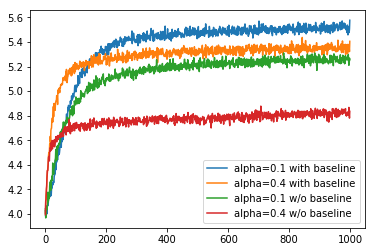

In [10]:
plt.plot(range(max_steps), average_rewards_1, label='alpha=0.1 with baseline')
plt.plot(range(max_steps), average_rewards_2, label='alpha=0.4 with baseline')
plt.plot(range(max_steps), average_rewards_3, label='alpha=0.1 w/o baseline')
plt.plot(range(max_steps), average_rewards_4, label='alpha=0.4 w/o baseline')
plt.legend()
plt.show()

### optimal action plot

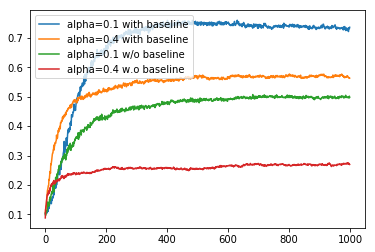

In [11]:
plt.plot(range(max_steps), optimal_action_1, label='alpha=0.1 with baseline')
plt.plot(range(max_steps), optimal_action_2, label='alpha=0.4 with baseline')
plt.plot(range(max_steps), optimal_action_3, label='alpha=0.1 w/o baseline')
plt.plot(range(max_steps), optimal_action_4, label='alpha=0.4 w.o baseline')
plt.legend()
plt.show()